# **VideoGeneration UI**

A Google Colab Video Generation UI
<br>

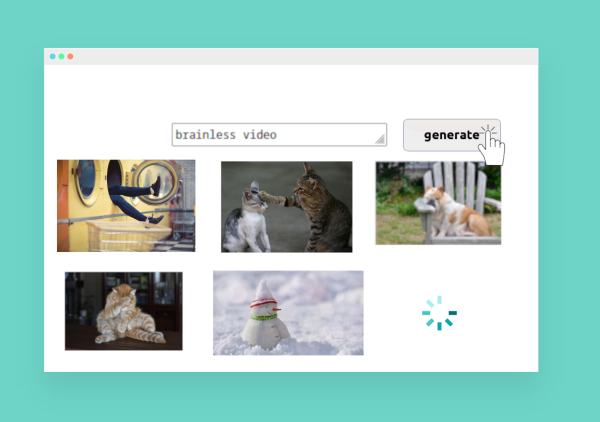

# Instructions
#### - run the cells.
#### - wait for your output video
#### - watch it.

In [ ]:
#@title Install packages and download the model
#@markdown <- press to install and prepare the model

!pip -q install torch==2.0.0 git+https://github.com/huggingface/diffusers transformers accelerate imageio[ffmpeg]

import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
from IPython.display import HTML
from base64 import b64encode

pipe = DiffusionPipeline.from_pretrained(
    "damo-vilab/text-to-video-ms-1.7b",
    torch_dtype=torch.float16,
    variant="fp16")

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()
print('DONE!')

In [6]:
#@title Create the Video and display it
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

#@title Generate your video and display it
prompt = 'coyotes Skiing down the mountain slopes  in winter' #@param {type:"string"}
negative_prompt = 'Ugly , Bad anatomy , Bad proportions , Bad quality , Blurry, Cropped , Deformed, Disconnected limbs , not coyotes ' #@param {type:"string"}
video_duration_seconds = 2 #@param {type:"integer"}
frames_per_second = 15 #@param {type:"integer"}
num_frames = video_duration_seconds * frames_per_second
video_frames = pipe(prompt, negative_prompt="low quality", num_inference_steps=25, num_frames=num_frames).frames
video_path = export_to_video(video_frames[0])


def display_video(video):
    fig = plt.figure(figsize=(4.2,4.2))  #Display size specification
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=100, repeat_delay=1000)

    plt.close()
    return anime
video = imageio.mimread(video_path)  #Loading video
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

  0%|          | 0/25 [00:00<?, ?it/s]